In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fastf1

In [2]:
import os

# Get the exact path to your folder
cache_path = os.path.join(os.getcwd(), 'cache')

# If the folder doesn't exist, create it
if not os.path.exists(cache_path):
    os.makedirs(cache_path)

# TELL FASTF1 TO USE THIS FOLDER
fastf1.Cache.enable_cache(cache_path)

In [3]:

session=fastf1.get_testing_session(2026, 2, 3)
session.load()

core           INFO 	Loading data for Pre-Season Testing - Practice 3 [v3.8.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '1'
core        WARNING 	Fixed incorrect tyre stint information for driver '3'
core        WARNING 	Fixed incorrect tyre stint information for driver '5'
core        WARNING 	Fixed incorrect tyre stint information for driver '6'
core        WARNING 	Fixed incorrect tyre stint information for driver '10'
core        WARNING 	No lap data for driver 14
core        WARNING 	Fixed incorrect tyre stint information for driver '16'
core        WARN

In [4]:
laps=session.laps

In [5]:
lec_data=laps[laps['Driver']=='LEC']
nor_data=laps[laps['Driver']=='NOR']


In [6]:
lec_car_data=lec_data.pick_fastest().get_car_data().add_distance()
nor_car_data=nor_data.pick_fastest().get_car_data().add_distance()

In [7]:
lec_car_data['LapTime in sec']=lec_car_data['Time'].dt.total_seconds()
nor_car_data['LapTime in sec']=nor_car_data['Time'].dt.total_seconds()

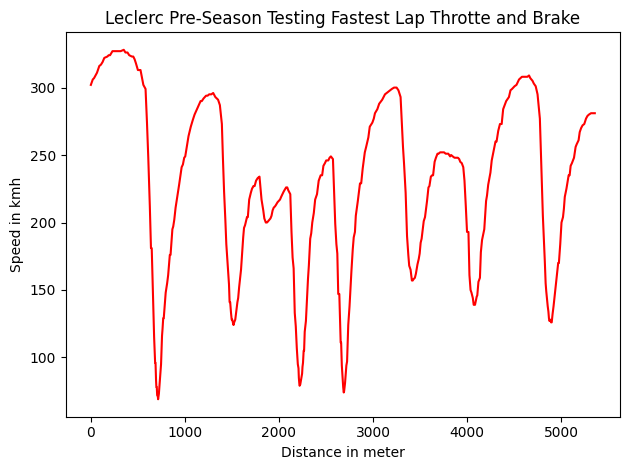

In [11]:
plt.plot(lec_car_data['Distance'],lec_car_data['Speed'],color='red')
plt.ylabel("Speed in kmh")
plt.xlabel("Distance in meter")
plt.title("Leclerc Pre-Season Testing Fastest Lap Throtte and Brake")
plt.tight_layout()

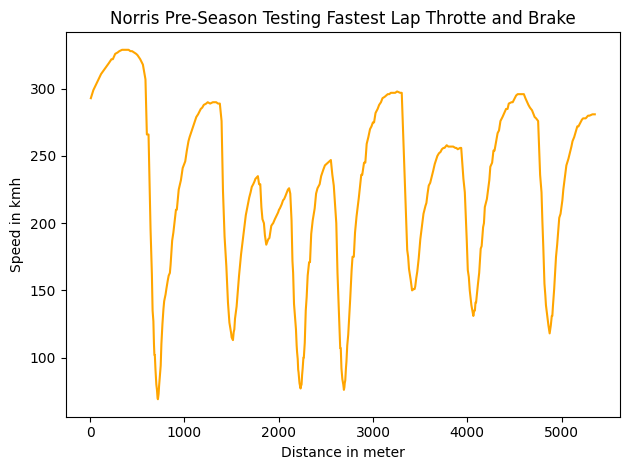

In [12]:
plt.plot(nor_car_data['Distance'],nor_car_data['Speed'],color='orange')
plt.ylabel("Speed in kmh")
plt.xlabel("Distance in meter")
plt.title("Norris Pre-Season Testing Fastest Lap Throtte and Brake")
plt.tight_layout()

In [13]:
lec_t10=lec_car_data[(lec_car_data['Distance']>2400)& (lec_car_data['Distance']<=3000)]

In [14]:
lec_t10[lec_t10['Brake']==True]

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance,LapTime in sec
178,2026-02-20 15:30:15.574,10647.0,247.0,6,32.0,True,0,car,0 days 00:00:45.199000,0 days 08:42:37.672000,2574.519444,45.199
179,2026-02-20 15:30:16.014,10082.0,199.0,6,5.0,True,0,car,0 days 00:00:45.639000,0 days 08:42:38.112000,2598.841667,45.639
180,2026-02-20 15:30:16.254,10377.0,184.0,6,4.0,True,0,car,0 days 00:00:45.879000,0 days 08:42:38.352000,2611.108333,45.879
181,2026-02-20 15:30:16.454,10634.0,177.0,4,4.0,True,0,car,0 days 00:00:46.079000,0 days 08:42:38.552000,2620.941667,46.079
182,2026-02-20 15:30:16.694,10531.0,147.0,4,3.0,True,0,car,0 days 00:00:46.319000,0 days 08:42:38.792000,2630.741667,46.319
183,2026-02-20 15:30:16.974,10541.0,147.0,4,1.0,True,0,car,0 days 00:00:46.599000,0 days 08:42:39.072000,2642.175000,46.599
184,2026-02-20 15:30:17.254,10275.0,122.0,2,0.0,True,0,car,0 days 00:00:46.879000,0 days 08:42:39.352000,2651.663889,46.879
185,2026-02-20 15:30:17.414,9995.0,111.0,2,0.0,True,0,car,0 days 00:00:47.039000,0 days 08:42:39.512000,2656.597222,47.039
186,2026-02-20 15:30:17.574,9968.0,111.0,2,0.0,True,0,car,0 days 00:00:47.199000,0 days 08:42:39.672000,2661.530556,47.199
187,2026-02-20 15:30:17.854,8266.0,94.0,2,0.0,True,0,car,0 days 00:00:47.479000,0 days 08:42:39.952000,2668.841667,47.479


In [15]:
lec_t10[lec_t10['Speed']==lec_t10['Speed'].min()]

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance,LapTime in sec
190,2026-02-20 15:30:18.774,6974.0,74.0,2,23.0,False,0,car,0 days 00:00:48.399000,0 days 08:42:40.872000,2689.075,48.399


In [16]:
lec_t10_1=lec_t10[(lec_t10['Distance']>=2689.075) & (lec_t10['Distance']<=2992.946)]

In [20]:
lec_t10_pick=lec_t10_1[lec_t10_1['Throttle']>95]

In [21]:
lec_t10_pick[lec_t10_pick['Distance']==lec_t10_pick['Distance'].min()]

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance,LapTime in sec
199,2026-02-20 15:30:21.414,10843.0,164.0,3,100.0,False,0,car,0 days 00:00:51.039000,0 days 08:42:43.512000,2770.790833,51.039


In [22]:
nor_t10=nor_car_data[(nor_car_data['Distance']>=2400) & (nor_car_data['Distance']<=3000)]

In [23]:
nor_t10_brake=nor_t10[nor_t10['Brake']==True]

In [24]:
nor_t10_brake[nor_t10_brake['Speed']==nor_t10_brake['Speed'].min()]

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance,LapTime in sec
178,2026-02-20 14:47:20.126,7938.0,84.0,2,0.0,True,0,car,0 days 00:00:48.454000,0 days 07:59:42.224000,2674.845833,48.454


In [25]:
nor_t10_throttle=nor_t10[(nor_t10['Distance']>=2674.845) & (nor_t10['Distance']<=2998.947)]

In [26]:
nor_t10_throttle[(nor_t10_throttle['Throttle']>95)]

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance,LapTime in sec
189,2026-02-20 14:47:23.166,10664.0,144.0,3,96.0,False,0,car,0 days 00:00:51.494000,0 days 07:59:45.264000,2758.437778,51.494
190,2026-02-20 14:47:23.486,11132.0,165.0,3,100.0,False,0,car,0 days 00:00:51.814000,0 days 07:59:45.584000,2773.104444,51.814
191,2026-02-20 14:47:23.686,11444.0,175.0,4,100.0,False,0,car,0 days 00:00:52.014000,0 days 07:59:45.784000,2782.826667,52.014
192,2026-02-20 14:47:23.966,10489.0,175.0,5,100.0,False,0,car,0 days 00:00:52.294000,0 days 07:59:46.064000,2796.437778,52.294
193,2026-02-20 14:47:24.206,10988.0,193.0,5,100.0,False,0,car,0 days 00:00:52.534000,0 days 07:59:46.304000,2809.304444,52.534
194,2026-02-20 14:47:24.486,11726.0,205.0,5,100.0,False,0,car,0 days 00:00:52.814000,0 days 07:59:46.584000,2825.248889,52.814
195,2026-02-20 14:47:24.886,10676.0,219.0,6,100.0,False,0,car,0 days 00:00:53.214000,0 days 07:59:46.984000,2849.582222,53.214
196,2026-02-20 14:47:25.126,11237.0,229.0,6,100.0,False,0,car,0 days 00:00:53.454000,0 days 07:59:47.224000,2864.848889,53.454
197,2026-02-20 14:47:25.286,11417.0,236.0,6,100.0,False,0,car,0 days 00:00:53.614000,0 days 07:59:47.384000,2875.337778,53.614
198,2026-02-20 14:47:25.446,11734.0,236.0,6,100.0,False,0,car,0 days 00:00:53.774000,0 days 07:59:47.544000,2885.826667,53.774


In [27]:
lec_t10[(lec_t10['Distance']>=2400) & (lec_t10['Brake']==True)]

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance,LapTime in sec
178,2026-02-20 15:30:15.574,10647.0,247.0,6,32.0,True,0,car,0 days 00:00:45.199000,0 days 08:42:37.672000,2574.519444,45.199
179,2026-02-20 15:30:16.014,10082.0,199.0,6,5.0,True,0,car,0 days 00:00:45.639000,0 days 08:42:38.112000,2598.841667,45.639
180,2026-02-20 15:30:16.254,10377.0,184.0,6,4.0,True,0,car,0 days 00:00:45.879000,0 days 08:42:38.352000,2611.108333,45.879
181,2026-02-20 15:30:16.454,10634.0,177.0,4,4.0,True,0,car,0 days 00:00:46.079000,0 days 08:42:38.552000,2620.941667,46.079
182,2026-02-20 15:30:16.694,10531.0,147.0,4,3.0,True,0,car,0 days 00:00:46.319000,0 days 08:42:38.792000,2630.741667,46.319
183,2026-02-20 15:30:16.974,10541.0,147.0,4,1.0,True,0,car,0 days 00:00:46.599000,0 days 08:42:39.072000,2642.175000,46.599
184,2026-02-20 15:30:17.254,10275.0,122.0,2,0.0,True,0,car,0 days 00:00:46.879000,0 days 08:42:39.352000,2651.663889,46.879
185,2026-02-20 15:30:17.414,9995.0,111.0,2,0.0,True,0,car,0 days 00:00:47.039000,0 days 08:42:39.512000,2656.597222,47.039
186,2026-02-20 15:30:17.574,9968.0,111.0,2,0.0,True,0,car,0 days 00:00:47.199000,0 days 08:42:39.672000,2661.530556,47.199
187,2026-02-20 15:30:17.854,8266.0,94.0,2,0.0,True,0,car,0 days 00:00:47.479000,0 days 08:42:39.952000,2668.841667,47.479


In [28]:
nor_t10[(nor_t10['Distance']>=2400) & (nor_t10['Brake']==True)]

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance,LapTime in sec
168,2026-02-20 14:47:17.406,11654.0,236.0,6,51.0,True,0,car,0 days 00:00:45.734000,0 days 07:59:39.504000,2568.723611,45.734
169,2026-02-20 14:47:17.646,10872.0,228.0,6,0.0,True,0,car,0 days 00:00:45.974000,0 days 07:59:39.744000,2583.923611,45.974
170,2026-02-20 14:47:18.126,11077.0,200.0,5,0.0,True,0,car,0 days 00:00:46.454000,0 days 07:59:40.224000,2610.590278,46.454
171,2026-02-20 14:47:18.406,10642.0,163.0,5,0.0,True,0,car,0 days 00:00:46.734000,0 days 07:59:40.504000,2623.268056,46.734
172,2026-02-20 14:47:18.726,10711.0,139.0,4,0.0,True,0,car,0 days 00:00:47.054000,0 days 07:59:40.824000,2635.623611,47.054
173,2026-02-20 14:47:18.926,9871.0,127.0,3,0.0,True,0,car,0 days 00:00:47.254000,0 days 07:59:41.024000,2642.679167,47.254
174,2026-02-20 14:47:19.246,10011.0,107.0,2,0.0,True,0,car,0 days 00:00:47.574000,0 days 07:59:41.344000,2652.190278,47.574
175,2026-02-20 14:47:19.446,9218.0,107.0,2,0.0,True,0,car,0 days 00:00:47.774000,0 days 07:59:41.544000,2658.134722,47.774
176,2026-02-20 14:47:19.726,8558.0,92.0,2,0.0,True,0,car,0 days 00:00:48.054000,0 days 07:59:41.824000,2665.290278,48.054
177,2026-02-20 14:47:19.926,8228.0,88.0,2,0.0,True,0,car,0 days 00:00:48.254000,0 days 07:59:42.024000,2670.179167,48.254


In [143]:
nor_t10.head()

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance,LapTime in sec
161,2026-02-20 14:47:15.047,10894.0,226.0,6,100.0,False,0,car,0 days 00:00:43.375000,0 days 07:59:37.145000,2411.353889,43.375
162,2026-02-20 14:47:15.406,11207.0,229.0,6,100.0,False,0,car,0 days 00:00:43.734000,0 days 07:59:37.504000,2434.190278,43.734
163,2026-02-20 14:47:15.646,11411.0,235.0,6,100.0,False,0,car,0 days 00:00:43.974000,0 days 07:59:37.744000,2449.856944,43.974
164,2026-02-20 14:47:16.006,11580.0,240.0,6,100.0,False,0,car,0 days 00:00:44.334000,0 days 07:59:38.104000,2473.856944,44.334
165,2026-02-20 14:47:16.246,11680.0,243.0,6,100.0,False,0,car,0 days 00:00:44.574000,0 days 07:59:38.344000,2490.056944,44.574


In [138]:
nor_t10[(nor_t10['Throttle']>95) & (nor_t10['Distance']>2574)].head()

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance,LapTime in sec
189,2026-02-20 14:47:23.166,10664.0,144.0,3,96.0,False,0,car,0 days 00:00:51.494000,0 days 07:59:45.264000,2758.437778,51.494
190,2026-02-20 14:47:23.486,11132.0,165.0,3,100.0,False,0,car,0 days 00:00:51.814000,0 days 07:59:45.584000,2773.104444,51.814
191,2026-02-20 14:47:23.686,11444.0,175.0,4,100.0,False,0,car,0 days 00:00:52.014000,0 days 07:59:45.784000,2782.826667,52.014
192,2026-02-20 14:47:23.966,10489.0,175.0,5,100.0,False,0,car,0 days 00:00:52.294000,0 days 07:59:46.064000,2796.437778,52.294
193,2026-02-20 14:47:24.206,10988.0,193.0,5,100.0,False,0,car,0 days 00:00:52.534000,0 days 07:59:46.304000,2809.304444,52.534


In [29]:
circuit_info = session.get_circuit_info()
corners = circuit_info.corners

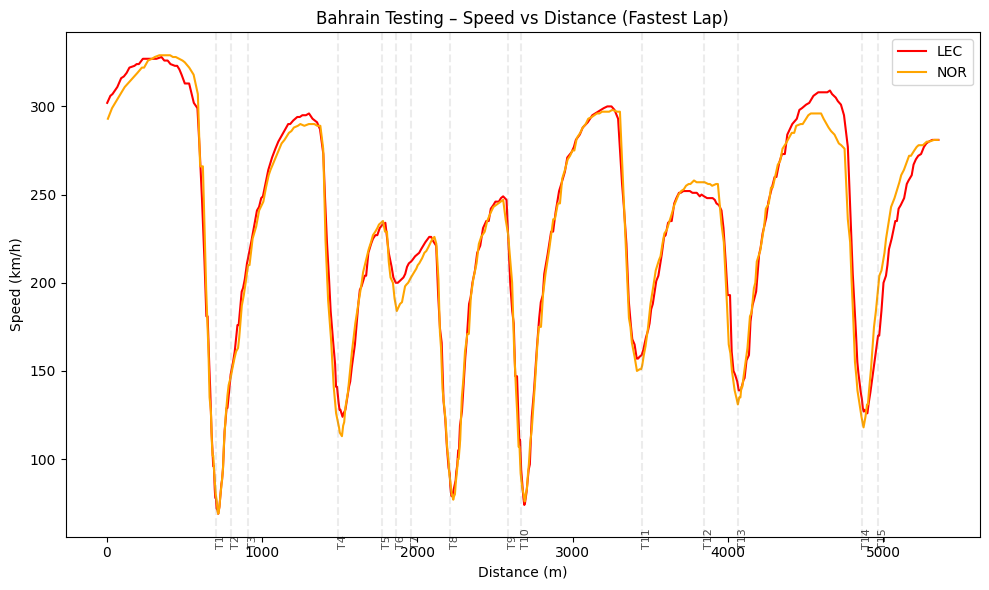

In [30]:
plt.figure(figsize=(10,6))

plt.plot(lec_car_data['Distance'],
         lec_car_data['Speed'],
         label='LEC',
         color='red')

plt.plot(nor_car_data['Distance'],
         nor_car_data['Speed'],
         label='NOR',
         color='orange')

for _, corner in corners.iterrows():
    plt.axvline(x=corner['Distance'],
                color='grey',
                linestyle='--',
                alpha=0.15)
    plt.text(corner['Distance'],
             50,
             f"T{int(corner['Number'])}",
             rotation=90,
             fontsize=8,
             alpha=0.7)

plt.xlabel("Distance (m)")
plt.ylabel("Speed (km/h)")
plt.title("Bahrain Testing – Speed vs Distance (Fastest Lap)")
plt.legend()
plt.tight_layout()
plt.show()

In [123]:
new_lec_data=lec_car_data[(lec_car_data['Distance']>=2400) & (lec_car_data['Distance']<=3000)].copy()

In [124]:
new_nor_data=nor_car_data[(nor_car_data['Distance']>=2400) & (nor_car_data['Distance']<=3000)].copy()

In [125]:
new_nor_data=new_nor_data.sort_values('Distance')
new_lec_data=new_lec_data.sort_values('Distance')

In [126]:
distance_lec = new_lec_data['Distance'].values
time_lec = new_lec_data['LapTime in sec'].values

distance_nor = new_nor_data['Distance'].values
time_nor = new_nor_data['LapTime in sec'].values

In [130]:
nor_aligned = np.interp(distance_lec,distance_nor,time_nor)

In [133]:
delta=nor_aligned - time_lec

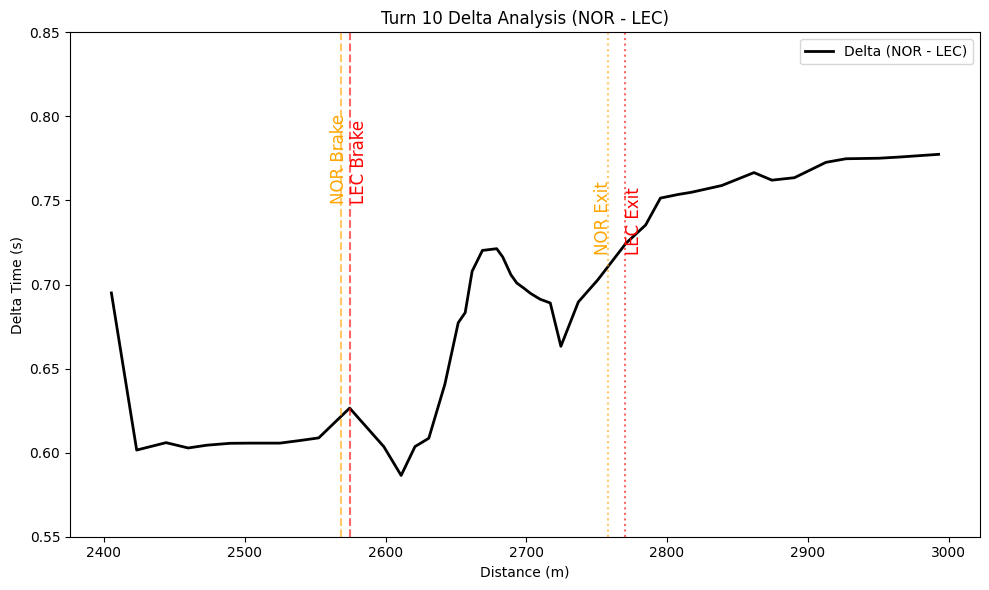

In [153]:
plt.figure(figsize=(10,6))

plt.plot(distance_lec, delta, color='black', linewidth=2, label='Delta (NOR - LEC)')

plt.axhline(0, linestyle='--', color='grey', alpha=0.4)

plt.axvline(x=lec_brake_d, linestyle='--', color='red', alpha=0.6)
plt.text(lec_brake_d, 0.75, "LEC Brake", rotation=90,fontsize=12, color='red')

plt.axvline(x=nor_brake_d, linestyle='--', color='orange', alpha=0.6)
plt.text(nor_brake_d-8, 0.75, "NOR Brake", rotation=90,fontsize=12, color='orange')

plt.axvline(x=lec_throttle_s, linestyle=':', color='red', alpha=0.6)
plt.text(lec_throttle_s, 0.72, "LEC Exit", rotation=90,fontsize=12, color='red')

plt.axvline(x=nor_throttle_s, linestyle=':', color='orange', alpha=0.6)
plt.text(nor_throttle_s-10, 0.72, "NOR Exit", rotation=90,fontsize=12, color='orange')

plt.xlabel("Distance (m)")
plt.ylabel("Delta Time (s)")
plt.title("Turn 10 Delta Analysis (NOR - LEC)")
plt.ylim(0.55,0.85)
plt.legend()
plt.tight_layout()
plt.show()